## Results

In [1]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as sf

plt.style.use('bmh')
pd.options.display.max_columns = 500

In [2]:
features = ['broadcaster', 'credits', 'description_tfidf', 'genres', 'title_tfidf', 'sub_tfidf']

def combinations(features):
    combi = []
    for i in range(1, len(features)+1):
        combi = combi + list(itertools.combinations(features,i))
    return combi

combi = combinations(features)
combi.insert(0, None)
print(len(combi))

64


In [32]:
combi[48]

('broadcaster', 'description_tfidf', 'genres', 'title_tfidf')

## V3

In [3]:
parts = ['0-18(2)-', '18-40(2)-', '40-58(2)-', '58-64(2)-'] 

paths = []
for i in range(0, len(parts)):
    paths.append('gs://dataproc-jupyter-eileen.npo-data.nl/data/results/marchv3results' + parts[i])
results_df = spark.read.parquet(*paths)

df = results_df.toPandas()
df['combination'] = df['combi']
df.sort_values('combi')

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features,combination
319,100.0,0.125987,0.118797,0.093548,0.102973,0.367549,0.345053,0.284095,0.310698,0,None,0
317,80.0,0.123449,0.118242,0.087097,0.102365,0.357388,0.340009,0.290237,0.323204,0,None,0
316,70.0,0.121541,0.118073,0.091935,0.102860,0.350971,0.337309,0.294809,0.328142,0,None,0
315,60.0,0.119787,0.118151,0.090323,0.102721,0.344512,0.334003,0.285480,0.323541,0,None,0
314,50.0,0.117043,0.117708,0.087097,0.099164,0.335407,0.329289,0.271536,0.310306,0,None,0
318,90.0,0.124728,0.118471,0.090323,0.102721,0.363077,0.343367,0.284736,0.316029,0,None,0
312,30.0,0.110136,0.116678,0.082258,0.098414,0.305771,0.309908,0.253476,0.291391,0,None,0
311,20.0,0.104912,0.115633,0.077419,0.097417,0.286896,0.296540,0.251671,0.286464,0,None,0
310,10.0,0.096206,0.113375,0.080645,0.098109,0.254884,0.273036,0.221636,0.246162,0,None,0
313,40.0,0.113901,0.117203,0.085484,0.098941,0.324030,0.322602,0.268061,0.300674,0,None,0


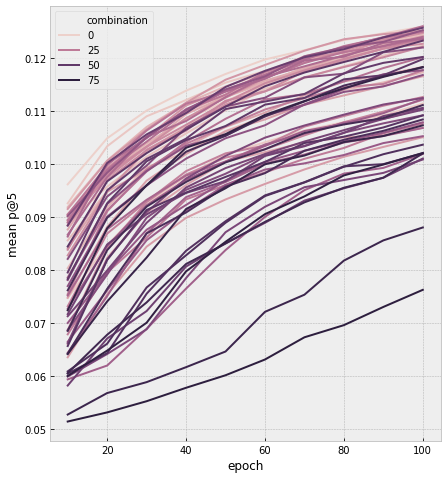

In [58]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combination', ax=axes)
#axes.set_title("Mean precision@5 for all content feature combinations")
axes.set(ylabel='mean p@5')
plt.show()

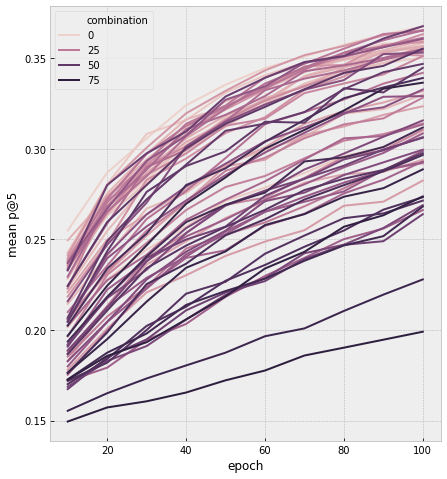

In [59]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combination', ax=axes)
axes.set(ylabel='mean p@5')
plt.show()

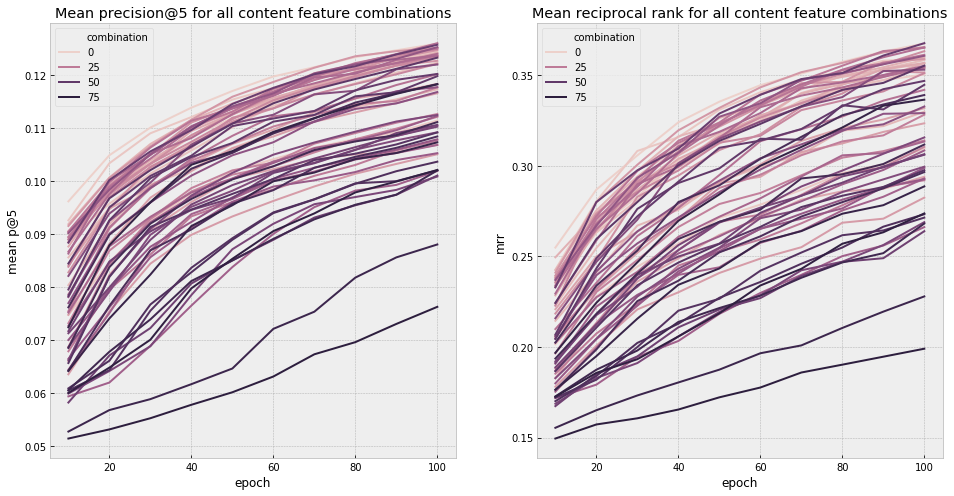

In [4]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combination', ax=axes[0])
axes[0].set_title("Mean precision@5 for all content feature combinations")
axes[0].set(ylabel='mean p@5')
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combination', ax=axes[1])
axes[1].set_title("Mean reciprocal rank for all content feature combinations")
axes[1].set(ylabel='mrr')
plt.show()

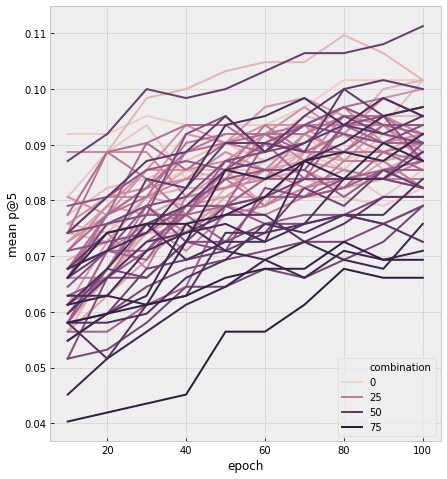

In [60]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_p52",data=df, hue='combination', ax=axes)
axes.set(ylabel='mean p@5')
plt.show()

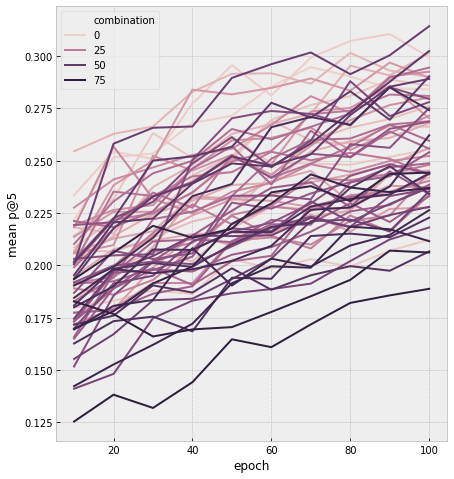

In [61]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df, hue='combination', ax=axes)
axes.set(ylabel='mean p@5')
plt.show()

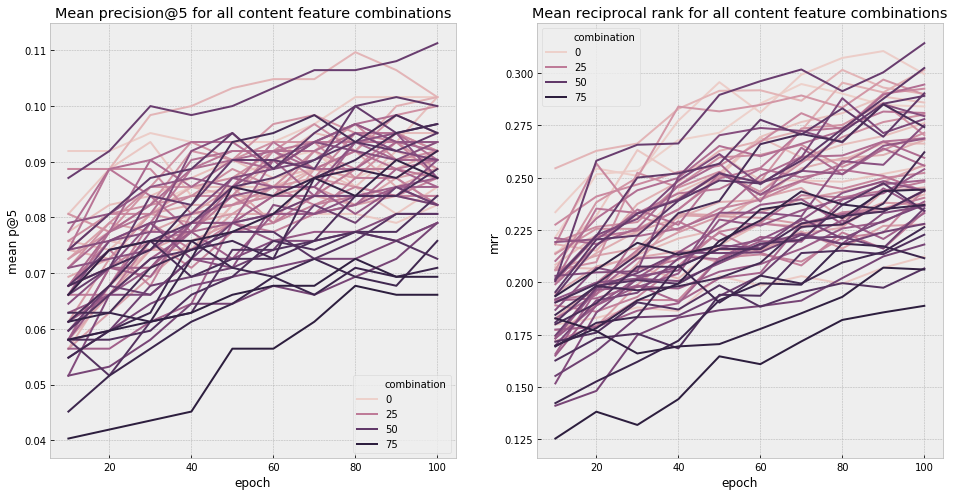

In [5]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p52",data=df, hue='combination', ax=axes[0])
axes[0].set_title("Mean precision@5 for all content feature combinations")
axes[0].set(ylabel='mean p@5')
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df, hue='combination', ax=axes[1])
axes[1].set_title("Mean reciprocal rank for all content feature combinations")
axes[1].set(ylabel='mrr')
plt.show()

### precision

In [6]:
# highest mean p@k
p5 = df.groupby(['combination'])['test_p5'].transform(max) == df['test_p5']
df_p5 = df[p5].copy()
df_p5.sort_values('test_p5', ascending=False)
df_p5.loc[df_p5['test_p5'].idxmax()]

epoch                                                100
test_p5                                         0.126077
p5_std                                          0.118918
test_p52                                       0.0951613
p5_std2                                        0.0998829
test_r-rank                                     0.365413
rank_std                                        0.343312
test_r-rank2                                    0.294563
rank_std2                                        0.31661
combi                                                 29
features        ('broadcaster', 'genres', 'title_tfidf')
combination                                           29
Name: 9, dtype: object

In [7]:
df_p5.sort_values('test_p5', ascending=False)

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features,combination
9,100.0,0.126077,0.118918,0.095161,0.099883,0.365413,0.343312,0.294563,0.316610,29,"('broadcaster', 'genres', 'title_tfidf')",29
319,100.0,0.125987,0.118797,0.093548,0.102973,0.367549,0.345053,0.284095,0.310698,0,None,0
519,100.0,0.125775,0.118789,0.111290,0.102556,0.367717,0.345132,0.314320,0.318018,48,"('broadcaster', 'description_tfidf', 'genres',...",48
99,100.0,0.125325,0.118983,0.093548,0.102973,0.360740,0.340821,0.268696,0.279982,38,"('description_tfidf', 'genres', 'title_tfidf')",38
399,100.0,0.125222,0.118605,0.101613,0.106244,0.356440,0.336165,0.290091,0.292792,8,"('broadcaster', 'description_tfidf')",8
299,100.0,0.125216,0.118509,0.091935,0.105949,0.365648,0.343280,0.289701,0.303026,16,"('description_tfidf', 'genres')",16
129,100.0,0.125145,0.118372,0.091935,0.099674,0.363304,0.342756,0.271514,0.298715,19,"('genres', 'title_tfidf')",19
199,100.0,0.125010,0.118823,0.093548,0.099792,0.365128,0.345006,0.280995,0.304990,26,"('broadcaster', 'description_tfidf', 'genres')",26
309,100.0,0.124760,0.118551,0.088710,0.099361,0.358960,0.339669,0.270385,0.284077,17,"('description_tfidf', 'title_tfidf')",17
349,100.0,0.124439,0.118531,0.085484,0.102149,0.359025,0.339754,0.255533,0.278835,3,"('description_tfidf',)",3


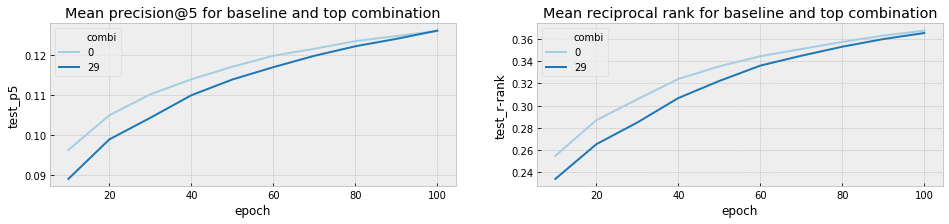

In [9]:
high_base = [0, 29]
df_50 = df[df['combination'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p5",data=df_50, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df_50, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

In [18]:
# highest mean p@k
p52 = df.groupby(['combination'])['test_p52'].transform(max) == df['test_p52']
df_p52 = df[p52].copy()
df_p52.sort_values('test_p52', ascending=False)
df_p52.loc[df_p52['test_p52'].idxmax()]

epoch                                                         100
test_p5                                                  0.125775
p5_std                                                   0.118789
test_p52                                                  0.11129
p5_std2                                                  0.102556
test_r-rank                                              0.367717
rank_std                                                 0.345132
test_r-rank2                                              0.31432
rank_std2                                                0.318018
combi                                                          48
features        ('broadcaster', 'description_tfidf', 'genres',...
combination                                                    48
Name: 519, dtype: object

In [11]:
df_p52.sort_values('test_p52', ascending=False)

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features,combination
519,100.0,0.125775,0.118789,0.111290,0.102556,0.367717,0.345132,0.314320,0.318018,48,"('broadcaster', 'description_tfidf', 'genres',...",48
397,80.0,0.122100,0.118111,0.109677,0.105814,0.349088,0.333252,0.301567,0.304144,8,"('broadcaster', 'description_tfidf')",8
229,100.0,0.123822,0.118526,0.101613,0.099987,0.360053,0.341333,0.301597,0.318552,9,"('broadcaster', 'genres')",9
327,80.0,0.120191,0.118582,0.101613,0.103163,0.342382,0.331058,0.307278,0.325489,1,"('broadcaster',)",1
369,100.0,0.123578,0.118835,0.101613,0.103163,0.354384,0.337488,0.276144,0.294302,5,"('title_tfidf',)",5
568,90.0,0.116812,0.117457,0.101613,0.103163,0.331152,0.324492,0.269624,0.289265,50,"('broadcaster', 'description_tfidf', 'title_tf...",50
329,100.0,0.123301,0.118911,0.101613,0.103163,0.350450,0.333507,0.299571,0.309275,1,"('broadcaster',)",1
328,90.0,0.121849,0.118646,0.101613,0.099987,0.347274,0.332679,0.310557,0.324191,1,"('broadcaster',)",1
557,80.0,0.117172,0.116933,0.100000,0.103175,0.332908,0.325376,0.271872,0.296457,49,"('broadcaster', 'description_tfidf', 'genres',...",49
119,100.0,0.122749,0.118390,0.100000,0.103175,0.351517,0.334904,0.280232,0.306023,18,"('description_tfidf', 'sub_tfidf')",18


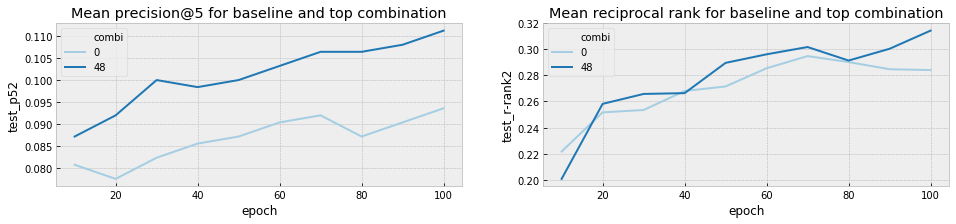

In [12]:
high_base = [0, 48]
df_54 = df[df['combination'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p52",data=df_54, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df_54, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

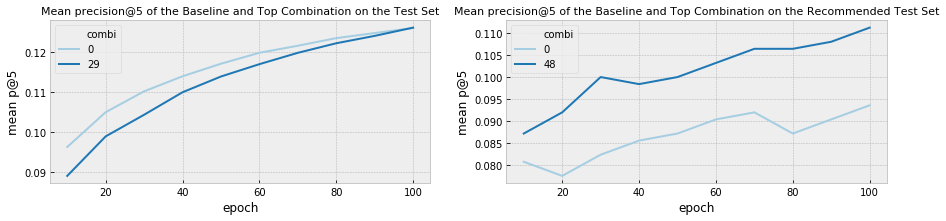

In [49]:
high_base1 = [0, 29]
df_precision1 = df[df['combination'].isin(high_base1)].copy()
high_base2 = [0, 48]
df_precision2 = df[df['combination'].isin(high_base2)].copy()

f, axes = plt.subplots(1, 2, figsize=(15,3))
ax = sns.lineplot(x="epoch", y="test_p5",data=df_precision1, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 of the Baseline and Top Combination on the Test Set", fontsize=11)
axes[0].set(ylabel='mean p@5')
ax = sns.lineplot(x="epoch", y="test_p52",data=df_precision2, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean precision@5 of the Baseline and Top Combination on the Recommended Test Set", fontsize = 11)
axes[1].set(ylabel='mean p@5')
plt.show()

### rank

In [19]:
# highest mean reciprocal rank
rr5 = df.groupby(['combination'])['test_r-rank'].transform(max) == df['test_r-rank']
df_rr5 = df[rr5].copy()
df_rr5.sort_values('test_r-rank', ascending=False)
df_rr5.loc[df_rr5['test_r-rank'].idxmax()]

epoch                                                         100
test_p5                                                  0.125775
p5_std                                                   0.118789
test_p52                                                  0.11129
p5_std2                                                  0.102556
test_r-rank                                              0.367717
rank_std                                                 0.345132
test_r-rank2                                              0.31432
rank_std2                                                0.318018
combi                                                          48
features        ('broadcaster', 'description_tfidf', 'genres',...
combination                                                    48
Name: 519, dtype: object

In [14]:
df_rr5.sort_values('test_r-rank', ascending=False)

,epoch,test_p5,p5_std,test_p52,p5_std2,test_r-rank,rank_std,test_r-rank2,rank_std2,combi,features,combination
519,100.0,0.125775,0.118789,0.111290,0.102556,0.367717,0.345132,0.314320,0.318018,48,"('broadcaster', 'description_tfidf', 'genres',...",48
319,100.0,0.125987,0.118797,0.093548,0.102973,0.367549,0.345053,0.284095,0.310698,0,None,0
299,100.0,0.125216,0.118509,0.091935,0.105949,0.365648,0.343280,0.289701,0.303026,16,"('description_tfidf', 'genres')",16
9,100.0,0.126077,0.118918,0.095161,0.099883,0.365413,0.343312,0.294563,0.316610,29,"('broadcaster', 'genres', 'title_tfidf')",29
199,100.0,0.125010,0.118823,0.093548,0.099792,0.365128,0.345006,0.280995,0.304990,26,"('broadcaster', 'description_tfidf', 'genres')",26
129,100.0,0.125145,0.118372,0.091935,0.099674,0.363304,0.342756,0.271514,0.298715,19,"('genres', 'title_tfidf')",19
209,100.0,0.123738,0.118185,0.090323,0.105814,0.361311,0.342610,0.243451,0.240614,27,"('broadcaster', 'description_tfidf', 'title_tf...",27
99,100.0,0.125325,0.118983,0.093548,0.102973,0.360740,0.340821,0.268696,0.279982,38,"('description_tfidf', 'genres', 'title_tfidf')",38
229,100.0,0.123822,0.118526,0.101613,0.099987,0.360053,0.341333,0.301597,0.318552,9,"('broadcaster', 'genres')",9
349,100.0,0.124439,0.118531,0.085484,0.102149,0.359025,0.339754,0.255533,0.278835,3,"('description_tfidf',)",3


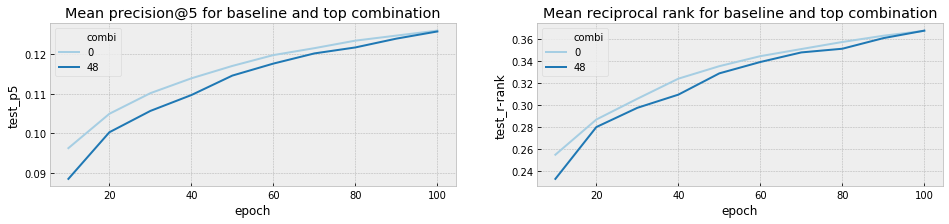

In [15]:
high_base = [0, 48]
df_50_rr = df[df['combination'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p5",data=df_50_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df_50_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

In [16]:
# highest mean reciprocal rank
rr52 = df.groupby(['combination'])['test_r-rank2'].transform(max) == df['test_r-rank2']
df_rr52 = df[rr52].copy()
df_rr52.sort_values('test_r-rank2', ascending=False)
df_rr52.loc[df_rr52['test_r-rank2'].idxmax()]

epoch                                                         100
test_p5                                                  0.125775
p5_std                                                   0.118789
test_p52                                                  0.11129
p5_std2                                                  0.102556
test_r-rank                                              0.367717
rank_std                                                 0.345132
test_r-rank2                                              0.31432
rank_std2                                                0.318018
combi                                                          48
features        ('broadcaster', 'description_tfidf', 'genres',...
combination                                                    48
Name: 519, dtype: object

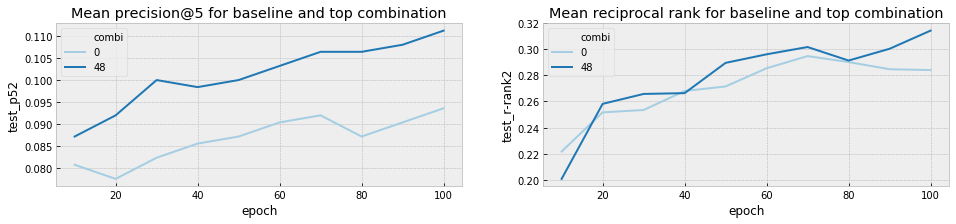

In [17]:
high_base = [0, 48]
df_41_rr = df[df['combination'].isin(high_base)].copy()
f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_p52",data=df_41_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("Mean precision@5 for baseline and top combination")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df_41_rr, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("Mean reciprocal rank for baseline and top combination")
plt.show()

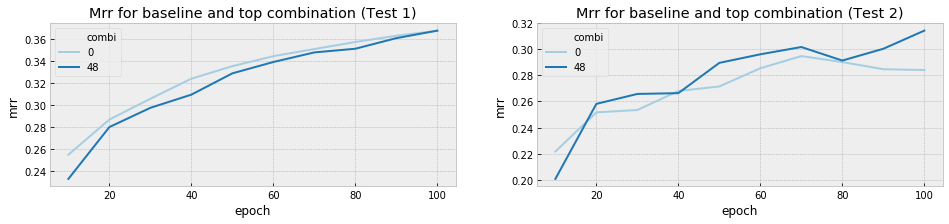

In [36]:
high_base1 = [0, 48]
df_rank1 = df[df['combination'].isin(high_base1)].copy()
high_base2 = [0, 48]
df_rank2 = df[df['combination'].isin(high_base2)].copy()

f, axes = plt.subplots(1, 2, figsize=(16,3))
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df_rank1, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[0])
axes[0].set_title("MRR for baseline and top combination (Test 1)")
axes[0].set(ylabel='mrr')
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df_rank2, hue='combi', palette=sns.color_palette("Paired", 2), ax=axes[1])
axes[1].set_title("MRR for baseline and top combination (Test 2)")
axes[1].set(ylabel='mrr')
plt.show()

## RQ3

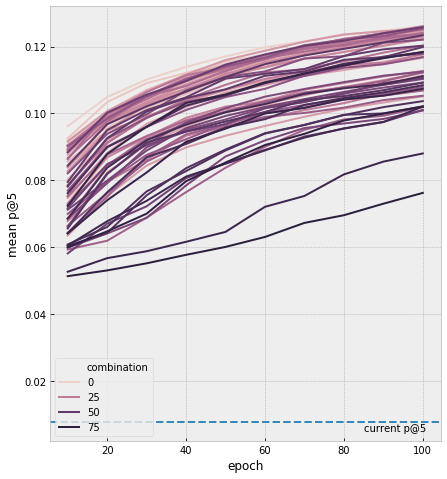

In [63]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combination', ax=axes)
axes.set(ylabel='mean p@5')
axes.axhline(0.008, ls='--')
axes.text(85, 0.005, "current p@5")
plt.show()

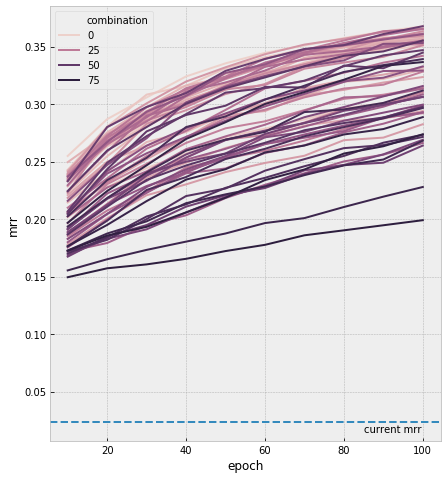

In [65]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combination', ax=axes)
axes.set(ylabel='mrr')
axes.axhline(0.024, ls='--')
axes.text(85, 0.015, "current mrr")
plt.show()

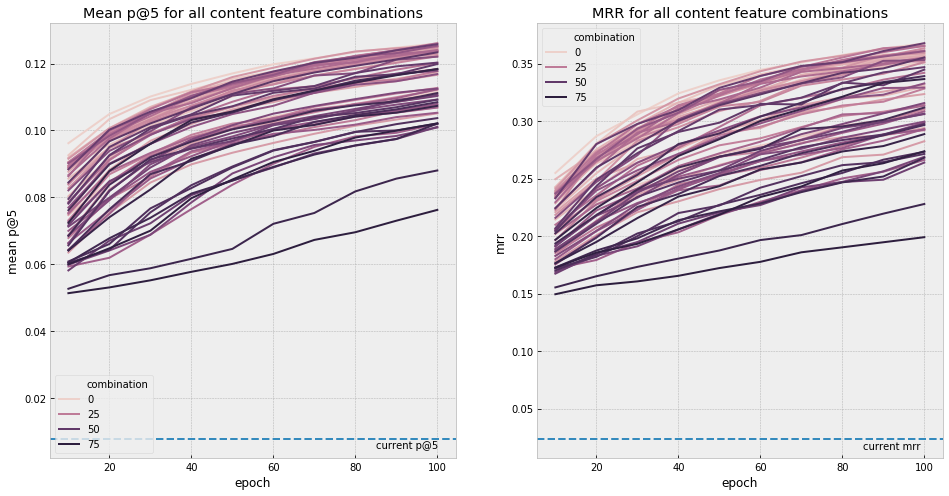

In [33]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p5",data=df, hue='combination', ax=axes[0])
axes[0].set_title("Mean p@5 for all content feature combinations")
axes[0].set(ylabel='mean p@5')
axes[0].axhline(0.008, ls='--')
axes[0].text(85, 0.005, "current p@5")
ax = sns.lineplot(x="epoch", y="test_r-rank",data=df, hue='combination', ax=axes[1])
axes[1].set_title("MRR for all content feature combinations")
axes[1].set(ylabel='mrr')
axes[1].axhline(0.024, ls='--')
axes[1].text(85, 0.015, "current mrr")
plt.show()

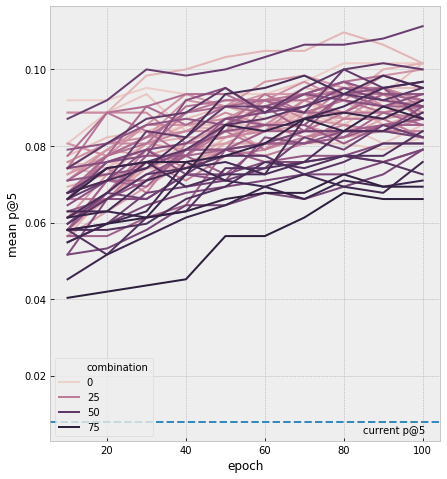

In [66]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_p52",data=df, hue='combination', ax=axes)
axes.set(ylabel='mean p@5')
axes.axhline(0.008, ls='--')
axes.text(85, 0.005, "current p@5")
plt.show()

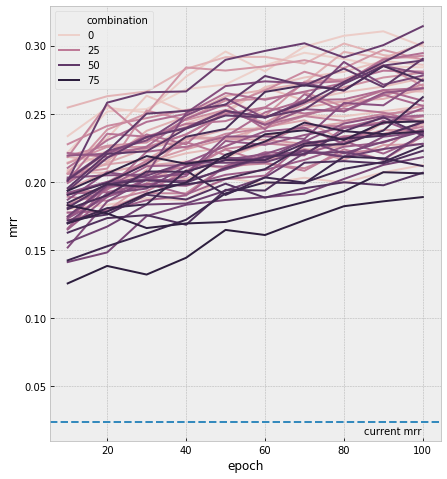

In [67]:
f, axes = plt.subplots(1, 1, figsize=(7,8))
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df, hue='combination', ax=axes)
axes.set(ylabel='mrr')
axes.axhline(0.024, ls='--')
axes.text(85, 0.015, "current mrr")
plt.show()

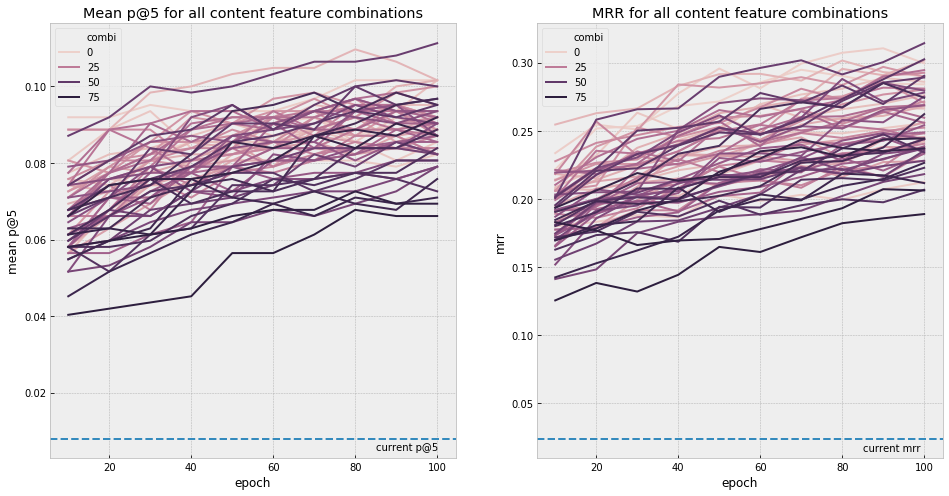

In [34]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="test_p52",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean p@5 for all content feature combinations")
axes[0].set(ylabel='mean p@5')
axes[0].axhline(0.008, ls='--')
axes[0].text(85, 0.005, "current p@5")
ax = sns.lineplot(x="epoch", y="test_r-rank2",data=df, hue='combi', ax=axes[1])
axes[1].set_title("MRR for all content feature combinations")
axes[1].set(ylabel='mrr')
axes[1].axhline(0.024, ls='--')
axes[1].text(85, 0.015, "current mrr")
plt.show()

### Standard deviation

(Is there a relation between high precision/ r-rank and low std?)

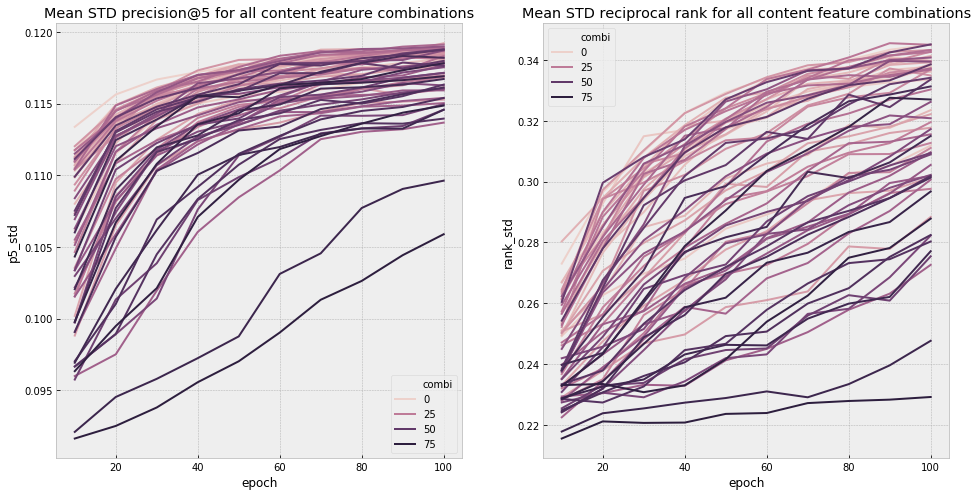

In [22]:
f, axes = plt.subplots(1, 2, figsize=(16,8))
ax = sns.lineplot(x="epoch", y="p5_std",data=df, hue='combi', ax=axes[0])
axes[0].set_title("Mean STD precision@5 for all content feature combinations")
ax = sns.lineplot(x="epoch", y="rank_std",data=df, hue='combi', ax=axes[1])
axes[1].set_title("Mean STD reciprocal rank for all content feature combinations")
plt.show()

In [23]:
p5_std = df.groupby(['combi'])['p5_std'].transform(min) == df['p5_std']
df_p5_std = df[p5_std].copy()
print(df_p5_std.loc[df_p5_std['p5_std'].idxmax()])
print(combi[19])

epoch                  10
test_p5         0.0962059
p5_std           0.113375
test_p52        0.0806452
p5_std2         0.0981091
test_r-rank      0.254884
rank_std         0.273036
test_r-rank2     0.221636
rank_std2        0.246162
combi                   0
features             None
combination             0
Name: 310, dtype: object
('genres', 'title_tfidf')


In [24]:
rr5_std = df.groupby(['combi'])['rank_std'].transform(min) == df['rank_std']
df_rr5_std = df[rr5_std].copy()
print(df_rr5_std.loc[df_rr5_std['rank_std'].idxmax()])
print(combi[19])

epoch                                  10
test_p5                         0.0905966
p5_std                           0.110879
test_p52                        0.0741936
p5_std2                         0.0966128
test_r-rank                      0.249505
rank_std                         0.280332
test_r-rank2                     0.218287
rank_std2                        0.263565
combi                                   9
features        ('broadcaster', 'genres')
combination                             9
Name: 220, dtype: object
('genres', 'title_tfidf')
